# Sequentially Comparing Forecasters: Comparison of Scoring Rules

Here, we run experiments analogous to [`nb_comparecast_synthetic.ipynb`](nb_comparecast_synthetic.ipynb) but with different choices of scoring rules (Brier, spherical, zero-one, truncated logarithmic, and Winkler).

See also: Section 5.1 in our paper.

YJ Choe [yjchoe@cmu.edu]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import comparecast as cc

import warnings
warnings.filterwarnings("ignore")

## Hyperparameter Settings

In [2]:
# significance level
alpha = 0.05

# whether to use the log scale on x-axis (time)
use_logx = False

# size up label fonts
font_scale = 1.75

## Forecasts on Synthetic Data

The synthetic data as well as the forecasts are generated from the command line via:
```shell
# changepoints evenly spaced in regular scale (default)
python forecast.py -d default -n 10000 -f all -o forecasts/default.csv -p plots/default
```

(Also run [`nb_comparecast_synthetic.ipynb`](nb_comparecast_synthetic.ipynb) to obtain additional forecasters.)

In [3]:
data_name = "default"
data_file = f"forecasts/{data_name}.csv"
plots_dir = f"plots/{data_name}/scoringrules"

data = cc.data_utils.synthetic.get_data(data_file)
data

,time,y,true_probs,laplace,k29_poly3,k29_rbf0.01,constant_0.5,constant_0,constant_1,random,mix_01_noiseless,mix_01,mix_10_noiseless,mix_10,k29
0,1,0,0.512573,0.500000,0.500000,0.500000,0.5,0.0,1.0,0.737568,0.2,0.488625,0.8,0.558226,0.500000
1,2,0,0.486790,0.250000,0.000000,0.000000,0.5,0.0,1.0,0.520202,0.2,0.440680,0.8,0.000000,0.000000
2,3,1,0.564042,0.166667,0.000000,0.000000,0.5,0.0,1.0,0.246811,0.2,0.000000,0.8,1.000000,0.000000
3,4,1,0.510490,0.375000,0.000000,0.000000,0.5,0.0,1.0,0.559666,0.2,1.000000,0.8,0.701330,0.000000
4,5,1,0.446433,0.500000,1.000000,1.000000,0.5,0.0,1.0,0.903658,0.2,0.000000,0.8,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0.333804,0.503351,0.179688,0.223633,0.5,0.0,1.0,0.065758,0.8,0.559687,0.2,0.000000,0.223633
9996,9997,0,0.155623,0.503301,0.176758,0.222656,0.5,0.0,1.0,0.283446,0.8,0.000000,0.2,0.000000,0.222656
9997,9998,0,0.158363,0.503251,0.174805,0.221680,0.5,0.0,1.0,0.610947,0.8,1.000000,0.2,0.574698,0.221680
9998,9999,0,0.073370,0.503200,0.172852,0.221680,0.5,0.0,1.0,0.162384,0.8,0.000000,0.2,0.000000,0.221680


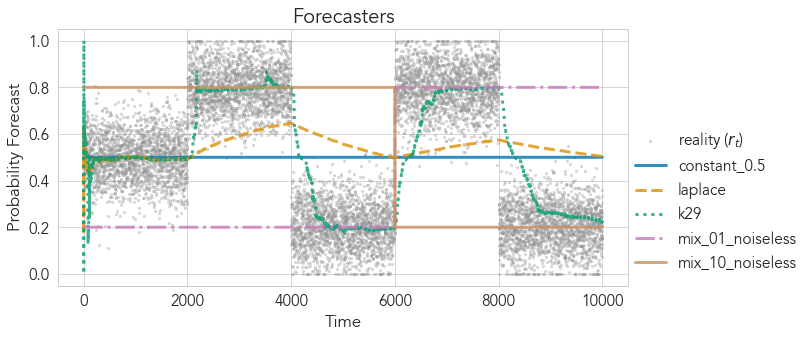

In [4]:
forecasters = [
    "constant_0.5",
    "laplace", 
    "k29", 
    "mix_01_noiseless", 
    "mix_10_noiseless",
]

cc.plot_forecasts(
    data, 
    forecasters=forecasters, 
    plots_dir=None,  # duplicate
    use_logx=use_logx,
    font_scale=font_scale,
)

## Example 1

*Bounds for the truncated logarithmic scoring rule:* $\log \epsilon \leq S_\epsilon(p, y) \leq 0$, with $\epsilon \in (0, 1)$, so $S_\epsilon(p, y) - S_\epsilon(q, y) \in [\log \epsilon, -\log \epsilon]$.
For example, if $\epsilon = 0.01$, then $\log \epsilon \approx -4.6$.

In [5]:
# scoring_rule: kwargs
scoring_rules = {
    "brier": {}, 
    "spherical": {}, 
    "zero_one": {}, 
    "absolute": {},
    "logarithmic": {"eps": 0.01},
}

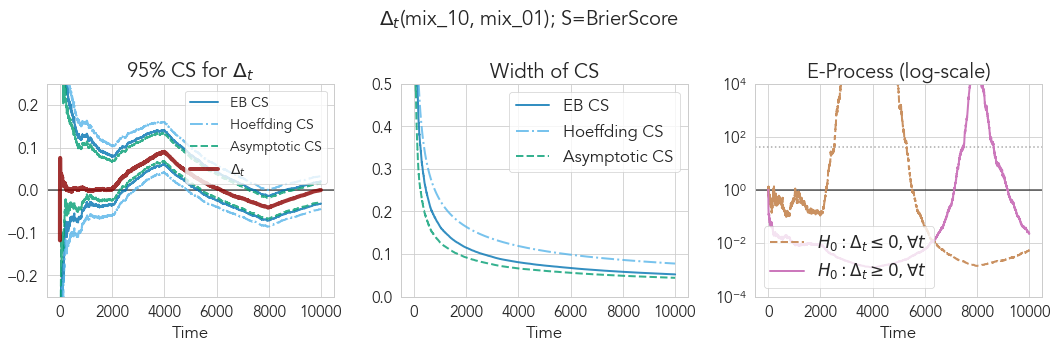

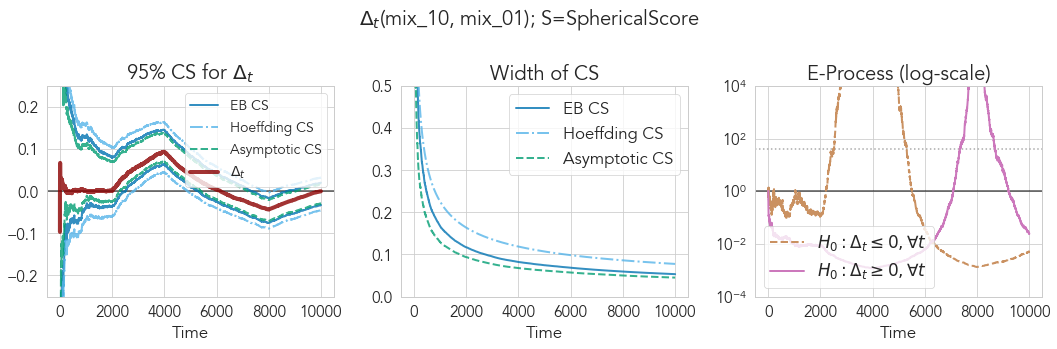

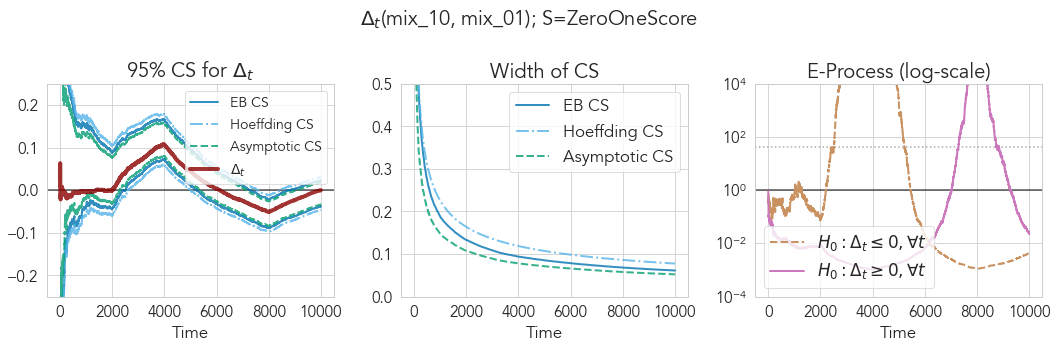

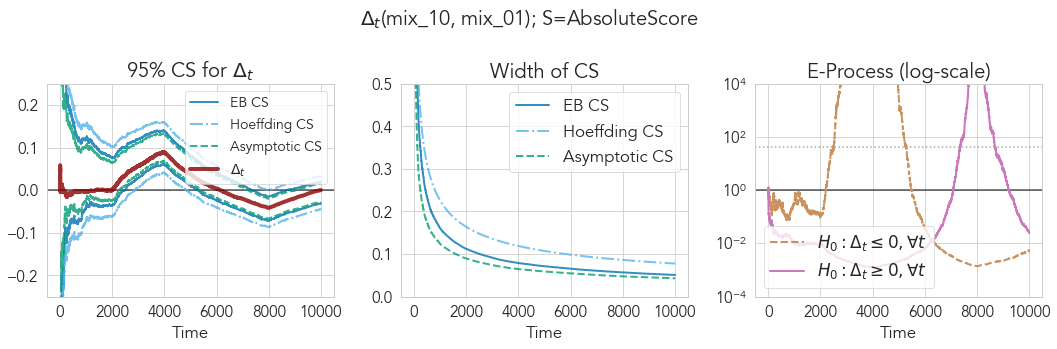

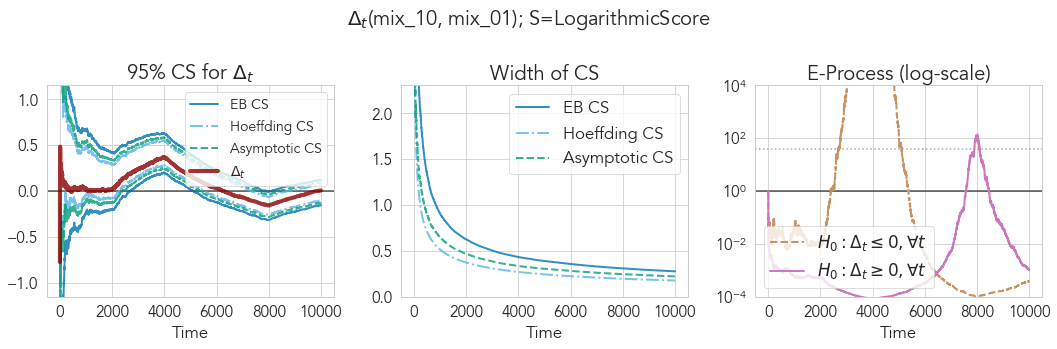

In [6]:
name_p = "mix_10"
name_q = "mix_01"

for scoring_rule, kwargs in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=cc.get_scoring_rule(scoring_rule, **kwargs),    
        plots_dir=plots_dir, 
        alpha=alpha,
        plot_e=True,
        plot_width=True,
        baselines=("h", "acs"),
        use_logx=use_logx,
        ylim_scale=0.25,
        font_scale=font_scale,
    )
    axes[0].legend(loc="upper right", fontsize="small")

## Example 2

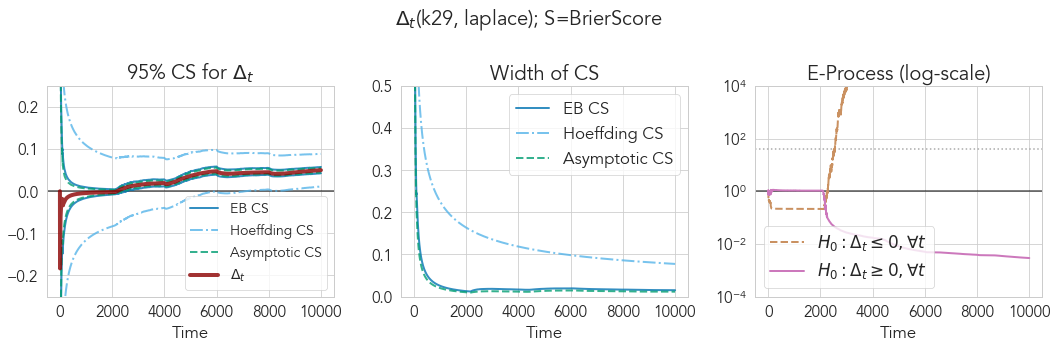

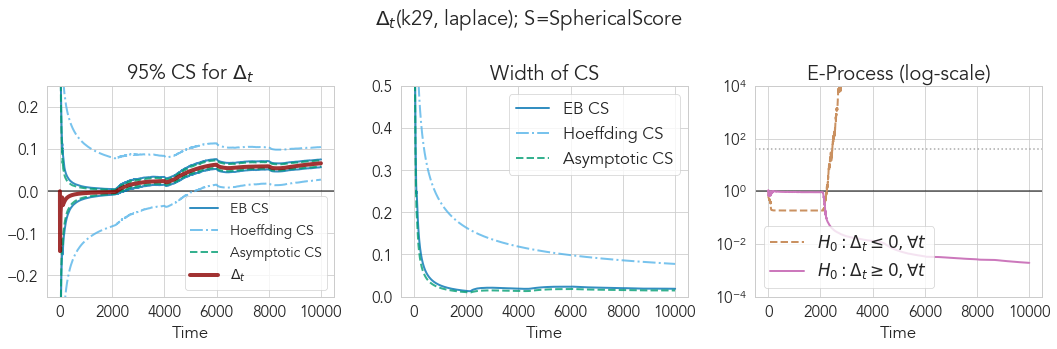

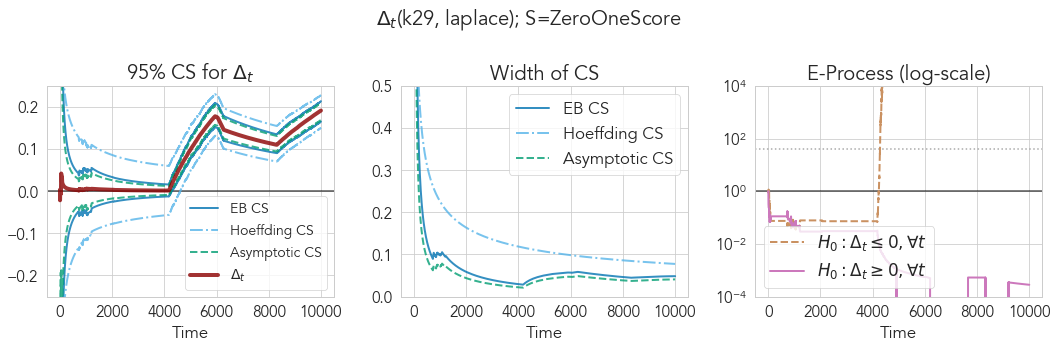

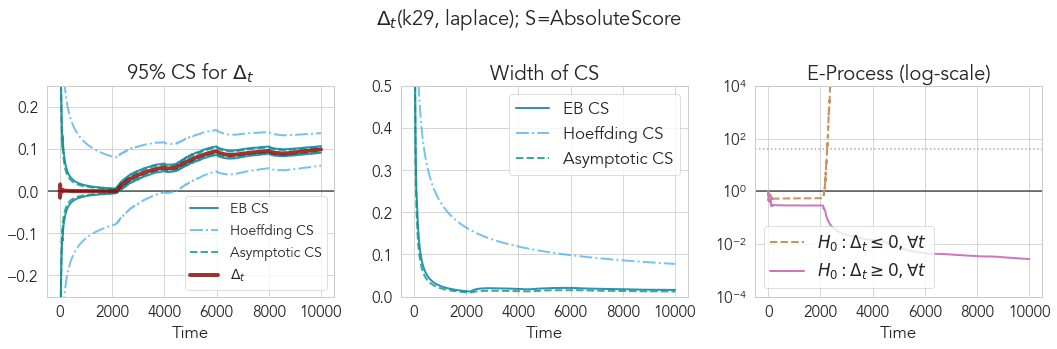

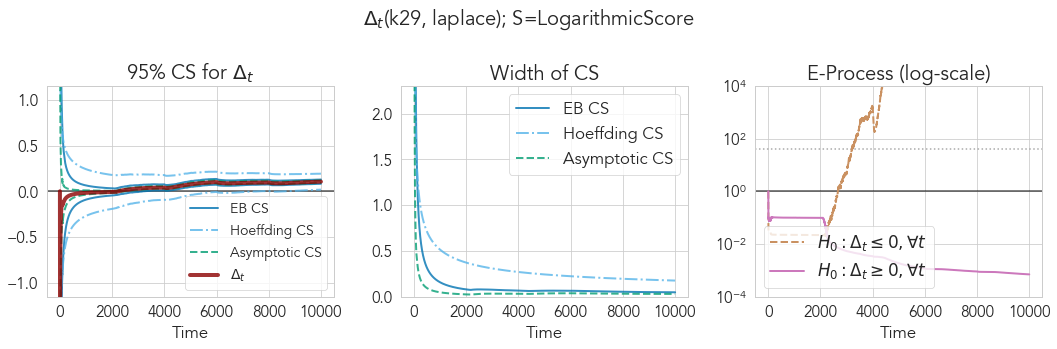

In [7]:
name_p = "k29"
name_q = "laplace"

for scoring_rule, kwargs in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=cc.get_scoring_rule(scoring_rule, **kwargs),    
        plots_dir=plots_dir, 
        alpha=alpha,
        plot_e=True,
        plot_width=True,
        baselines=("h", "acs"),
        use_logx=use_logx,
        ylim_scale=0.25,
        font_scale=font_scale,
    )
    axes[0].legend(loc="lower right", fontsize="small")

## Example 3

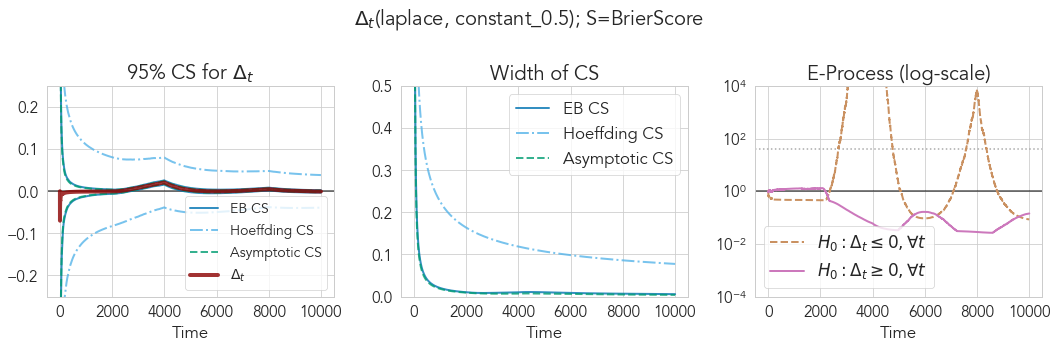

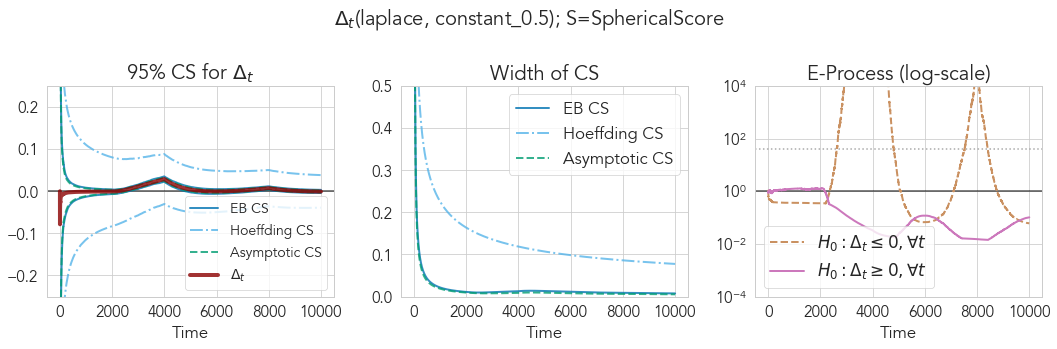

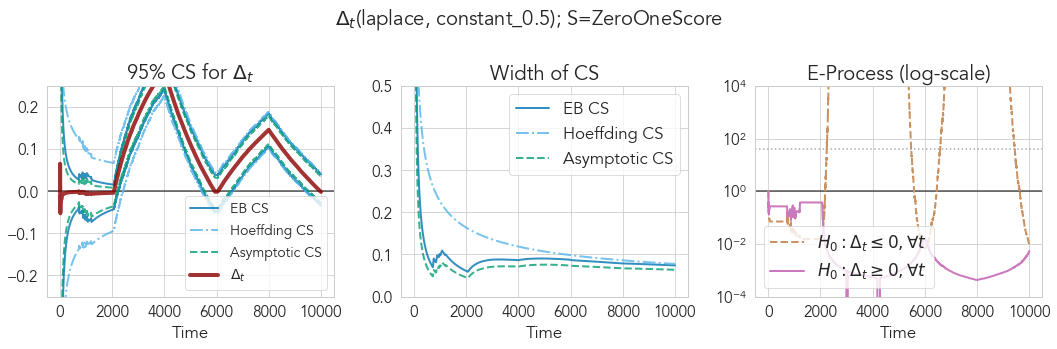

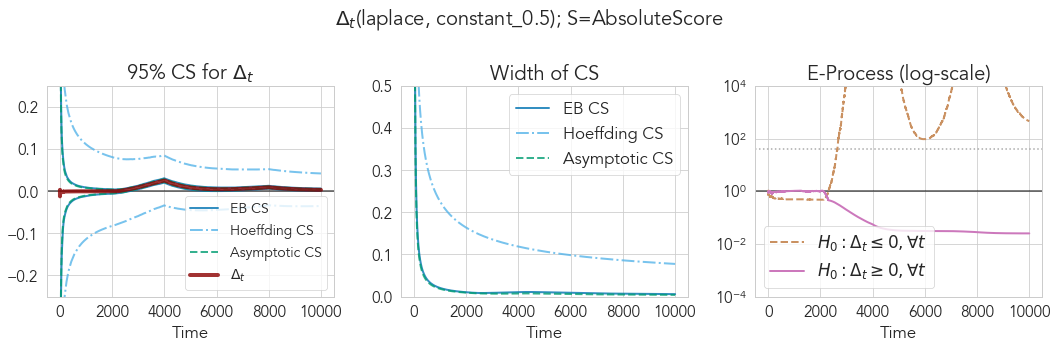

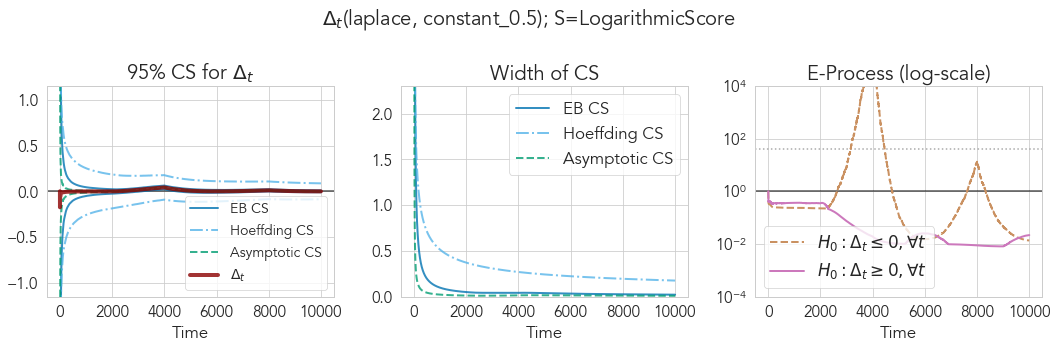

In [8]:
name_p = "laplace"
name_q = "constant_0.5"

for scoring_rule, kwargs in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=cc.get_scoring_rule(scoring_rule, **kwargs),    
        plots_dir=plots_dir, 
        alpha=alpha,
        plot_e=True,
        plot_width=True,
        baselines=("h", "acs"),
        use_logx=use_logx,
        ylim_scale=0.25,
        font_scale=font_scale,
    )
    axes[0].legend(loc="lower right", fontsize="small")